In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
print(pd.__version__)
print(tf.__version__)

1.0.5
2.3.0


In [3]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential. 
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))

    # Compile the model topography into code that 
    # TensorFlow can efficiently execute.
    # Configure training to minimize the model's mean squared error. 
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate), loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])

    return model
## END
print("Defined create_model")

Defined create_model


In [4]:
def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the model.
    # The model will train for the specified number of epochs, gradually learning how the feature values relate to the label values.
    history = model.fit(x = feature, y = label, batch_size = batch_size, epochs = epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse
## END
print("Defined train_model")

Defined train_model


In [5]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()
## END
print("Defined plot_the_model")

Defined plot_the_model


In [6]:
def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
## END
print("Defined plot_the_loss_curve")

Defined plot_the_loss_curve


Epoch 1/450
1/1 [==============================] - 0s 2ms/step - loss: 771.9474 - root_mean_squared_error: 27.7839
Epoch 2/450
1/1 [==============================] - 0s 2ms/step - loss: 757.5186 - root_mean_squared_error: 27.5231
Epoch 3/450
1/1 [==============================] - 0s 2ms/step - loss: 747.1828 - root_mean_squared_error: 27.3346
Epoch 4/450
1/1 [==============================] - 0s 2ms/step - loss: 738.6061 - root_mean_squared_error: 27.1773
Epoch 5/450
1/1 [==============================] - 0s 4ms/step - loss: 731.0496 - root_mean_squared_error: 27.0379
Epoch 6/450
1/1 [==============================] - 0s 9ms/step - loss: 724.1703 - root_mean_squared_error: 26.9104
Epoch 7/450
1/1 [==============================] - 0s 2ms/step - loss: 717.7779 - root_mean_squared_error: 26.7914
Epoch 8/450
1/1 [==============================] - 0s 998us/step - loss: 711.7536 - root_mean_squared_error: 26.6787
Epoch 9/450
1/1 [==============================] - 0s 5ms/step - loss: 706.018

1/1 [==============================] - 0s 2ms/step - loss: 458.3755 - root_mean_squared_error: 21.4097
Epoch 72/450
1/1 [==============================] - 0s 4ms/step - loss: 454.9668 - root_mean_squared_error: 21.3300
Epoch 73/450
1/1 [==============================] - 0s 4ms/step - loss: 451.5714 - root_mean_squared_error: 21.2502
Epoch 74/450
1/1 [==============================] - 0s 4ms/step - loss: 448.1893 - root_mean_squared_error: 21.1705
Epoch 75/450
1/1 [==============================] - 0s 997us/step - loss: 444.8205 - root_mean_squared_error: 21.0908
Epoch 76/450
1/1 [==============================] - 0s 2ms/step - loss: 441.4649 - root_mean_squared_error: 21.0111
Epoch 77/450
1/1 [==============================] - 0s 3ms/step - loss: 438.1225 - root_mean_squared_error: 20.9314
Epoch 78/450
1/1 [==============================] - 0s 6ms/step - loss: 434.7934 - root_mean_squared_error: 20.8517
Epoch 79/450
1/1 [==============================] - 0s 3ms/step - loss: 431.4774 - 

1/1 [==============================] - 0s 2ms/step - loss: 254.0201 - root_mean_squared_error: 15.9380
Epoch 141/450
1/1 [==============================] - 0s 3ms/step - loss: 251.5158 - root_mean_squared_error: 15.8592
Epoch 142/450
1/1 [==============================] - 0s 2ms/step - loss: 249.0245 - root_mean_squared_error: 15.7805
Epoch 143/450
1/1 [==============================] - 0s 997us/step - loss: 246.5461 - root_mean_squared_error: 15.7018
Epoch 144/450
1/1 [==============================] - 0s 2ms/step - loss: 244.0808 - root_mean_squared_error: 15.6231
Epoch 145/450
1/1 [==============================] - 0s 2ms/step - loss: 241.6284 - root_mean_squared_error: 15.5444
Epoch 146/450
1/1 [==============================] - 0s 2ms/step - loss: 239.1890 - root_mean_squared_error: 15.4657
Epoch 147/450
1/1 [==============================] - 0s 3ms/step - loss: 236.7626 - root_mean_squared_error: 15.3871
Epoch 148/450
1/1 [==============================] - 0s 7ms/step - loss: 234

1/1 [==============================] - 0s 3ms/step - loss: 109.9011 - root_mean_squared_error: 10.4834
Epoch 211/450
1/1 [==============================] - 0s 12ms/step - loss: 108.2969 - root_mean_squared_error: 10.4066
Epoch 212/450
1/1 [==============================] - 0s 997us/step - loss: 106.7053 - root_mean_squared_error: 10.3298
Epoch 213/450
1/1 [==============================] - 0s 3ms/step - loss: 105.1264 - root_mean_squared_error: 10.2531
Epoch 214/450
1/1 [==============================] - 0s 8ms/step - loss: 103.5602 - root_mean_squared_error: 10.1765
Epoch 215/450
1/1 [==============================] - 0s 4ms/step - loss: 102.0066 - root_mean_squared_error: 10.0998
Epoch 216/450
1/1 [==============================] - 0s 3ms/step - loss: 100.4656 - root_mean_squared_error: 10.0233
Epoch 217/450
1/1 [==============================] - 0s 3ms/step - loss: 98.9373 - root_mean_squared_error: 9.9467
Epoch 218/450
1/1 [==============================] - 0s 3ms/step - loss: 97.4

1/1 [==============================] - 0s 4ms/step - loss: 27.6942 - root_mean_squared_error: 5.2625
Epoch 281/450
1/1 [==============================] - 0s 2ms/step - loss: 26.9516 - root_mean_squared_error: 5.1915
Epoch 282/450
1/1 [==============================] - 0s 2ms/step - loss: 26.2208 - root_mean_squared_error: 5.1206
Epoch 283/450
1/1 [==============================] - 0s 3ms/step - loss: 25.5017 - root_mean_squared_error: 5.0499
Epoch 284/450
1/1 [==============================] - 0s 3ms/step - loss: 24.7943 - root_mean_squared_error: 4.9794
Epoch 285/450
1/1 [==============================] - 0s 3ms/step - loss: 24.0985 - root_mean_squared_error: 4.9090
Epoch 286/450
1/1 [==============================] - 0s 2ms/step - loss: 23.4144 - root_mean_squared_error: 4.8388
Epoch 287/450
1/1 [==============================] - 0s 2ms/step - loss: 22.7419 - root_mean_squared_error: 4.7688
Epoch 288/450
1/1 [==============================] - 0s 3ms/step - loss: 22.0810 - root_mean_s

1/1 [==============================] - 0s 6ms/step - loss: 1.5794 - root_mean_squared_error: 1.2567
Epoch 352/450
1/1 [==============================] - 0s 2ms/step - loss: 1.5260 - root_mean_squared_error: 1.2353
Epoch 353/450
1/1 [==============================] - 0s 6ms/step - loss: 1.4776 - root_mean_squared_error: 1.2156
Epoch 354/450
1/1 [==============================] - 0s 3ms/step - loss: 1.4340 - root_mean_squared_error: 1.1975
Epoch 355/450
1/1 [==============================] - 0s 2ms/step - loss: 1.3948 - root_mean_squared_error: 1.1810
Epoch 356/450
1/1 [==============================] - 0s 4ms/step - loss: 1.3598 - root_mean_squared_error: 1.1661
Epoch 357/450
1/1 [==============================] - 0s 3ms/step - loss: 1.3287 - root_mean_squared_error: 1.1527
Epoch 358/450
1/1 [==============================] - 0s 3ms/step - loss: 1.3011 - root_mean_squared_error: 1.1407
Epoch 359/450
1/1 [==============================] - 0s 2ms/step - loss: 1.2769 - root_mean_squared_er

1/1 [==============================] - 0s 2ms/step - loss: 0.9718 - root_mean_squared_error: 0.9858
Epoch 423/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9692 - root_mean_squared_error: 0.9845
Epoch 424/450
1/1 [==============================] - 0s 5ms/step - loss: 0.9666 - root_mean_squared_error: 0.9832
Epoch 425/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9641 - root_mean_squared_error: 0.9819
Epoch 426/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9616 - root_mean_squared_error: 0.9806
Epoch 427/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9592 - root_mean_squared_error: 0.9794
Epoch 428/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9568 - root_mean_squared_error: 0.9781
Epoch 429/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9544 - root_mean_squared_error: 0.9769
Epoch 430/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9521 - root_mean_squared_er

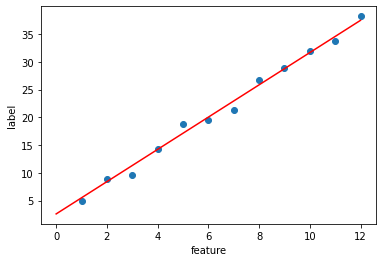

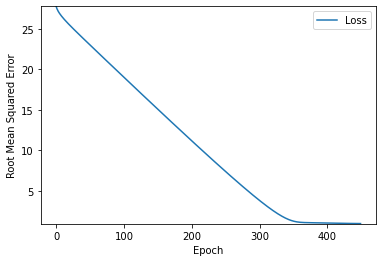

In [7]:
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

learning_rate = 0.01  # alpha

# A full training pass over the entire dataset such that each example has been seen once.
# Thus, an epoch represents N/batch size training iterations, where N is the total number of examples.
epochs = 450  # try other values like 100, 200 and so on till 1000.

# The number of examples in a batch.
# For example, the batch size of SGD is 1, while the batch size of a mini-batch is usually between 10 and 1000.
# Batch size is usually fixed during training and inference; however, TensorFlow does permit dynamic batch sizes.
my_batch_size = 200

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label,
                                                         epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


In [8]:
# Most machine learning problems require a lot of hyperparameter tuning.
# Unfortunately, we can't provide concrete tuning rules for every model. 
# Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. 
# We must experiment to find the best set of hyperparameters for our dataset.
# That said, here are a few rules of thumb:

# Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
# If the training loss does not converge, train for more epochs.
# If the training loss decreases too slowly, increase the learning rate.
# Note that setting the learning rate too high may also prevent training loss from converging.
# If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.

# Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
# Setting the batch size to a very small batch number can also cause instability.
# First, try large batch size values. Then, decrease the batch size until you see degradation.
# For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory.
# In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

# Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.